<br>

## Project 2020 - Fundamentals of Data Analysis
***

#### Eibhinn Lee
#### G00226502
***

### Aim of the project
***

The aim of the project is to perform and explain 'Simple Linear Regression' using Pythin on the following dataset (powerproduction dataset) - https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv.

___

###### Overall Goal of the Project

The goal is to accurately predict wind turbine power output from wind speed values using the data as a basis.

___

##### Project Format

    - 


Import python libraries to be used within the Project

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.rcParams['figure.figsize'] = (25, 20)

In [34]:
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [30]:
# shape of dataset
df.shape

(500, 2)

In [35]:
# stat data of dataset
# showing a break down of each variable (mean, standard deviation, min & max values within the dataset for each variable)
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


https://realpython.com/pandas-plot-python/

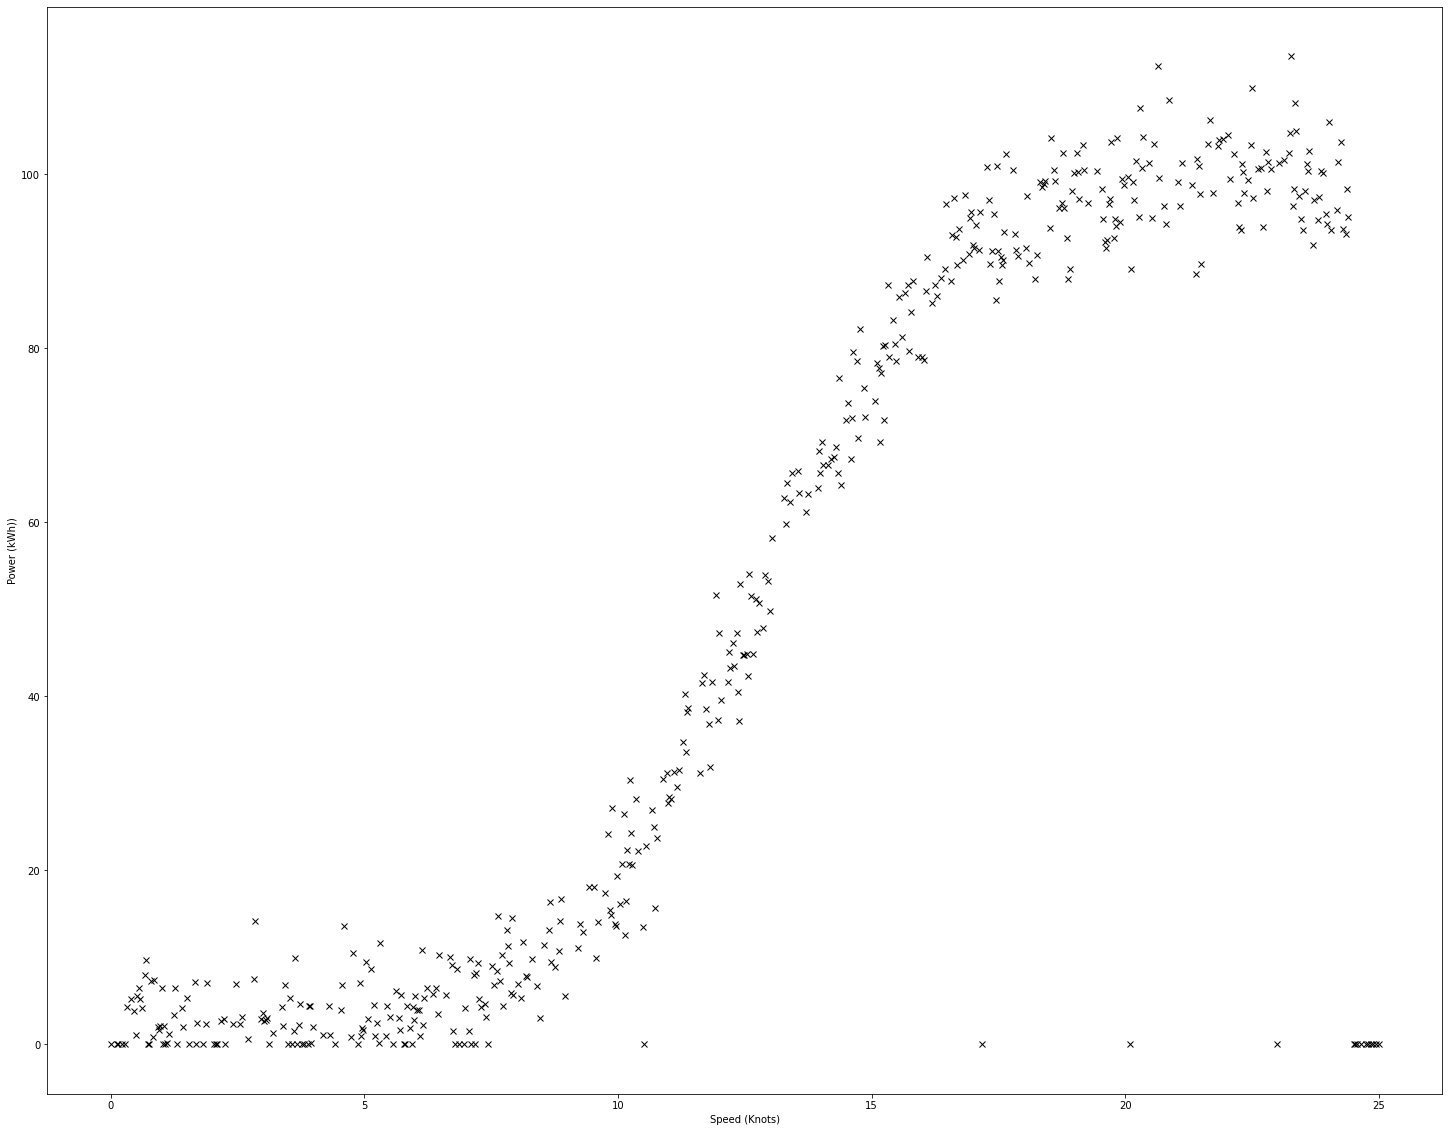

In [41]:
# Initial look at the dataset in the form of a graph
# You can see the shape of the graph is more 'S' shaped than straight
# And that at a max speed of 25 knots the power remains at zero.


# Calling each variable x & y
x = df['speed']
y = df['power']

# Plotting x & y, with each point marked with an x.
plt.plot(x, y, 'kx')

# labelling the x-axis & y- axis
plt.xlabel('Speed (Knots)')
plt.ylabel('Power (kWh))')

plt.show()

https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html


https://towardsdatascience.com/machine-learning-with-python-easy-and-robust-method-to-fit-nonlinear-data-19e8a1ddbd49



cubic regression
https://www.geeksforgeeks.org/non-linear-regression-examples-ml/

https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

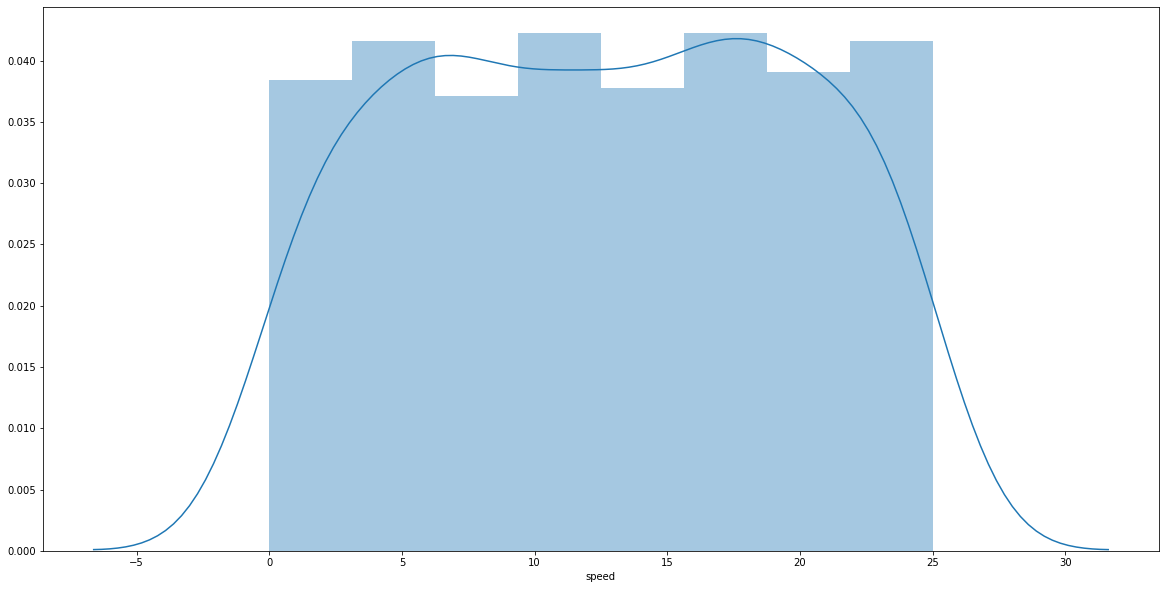

In [42]:
plt.figure(figsize=(20,10))
plt.tight_layout()
sns.distplot(df['speed'])

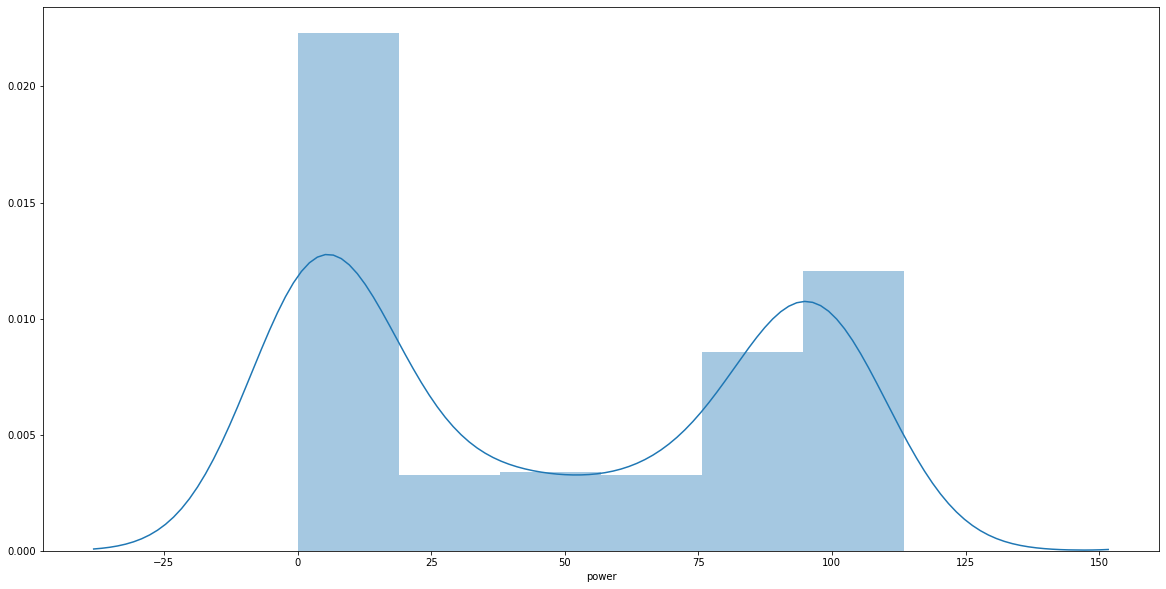

In [43]:
plt.figure(figsize=(20,10))
plt.tight_layout()
sns.distplot(df['power'])

In [48]:
# the below code looks at the relationsip or the coefficient of correlation known as 'r' between the x and y axis
# The output will allow me to identify if linear regression can be used for the dataset
# The r value ranges from -1 to 1, where 0 means no relationship, and 1 (and -1) means 100% related.
# https://www.w3schools.com/python/python_ml_linear_regression.asp

slope, intercept, r, p, std_err = stats.linregress(x, y)

print(r)

# The result below shows that there is a linear relationship between the x and y axis

0.8537775037188597


https://www.metoffice.gov.uk/weather/guides/observations/how-we-measure-wind#:~:text=The%20instruments%20used%20to%20measure,%2D1%20%3D%201.15%20mph).

https://www.ammonit.com/en/wind/wind-energy#:~:text=What%20is%20the%20Measuring%20Unit,per%20year%20and%20per%20hour.

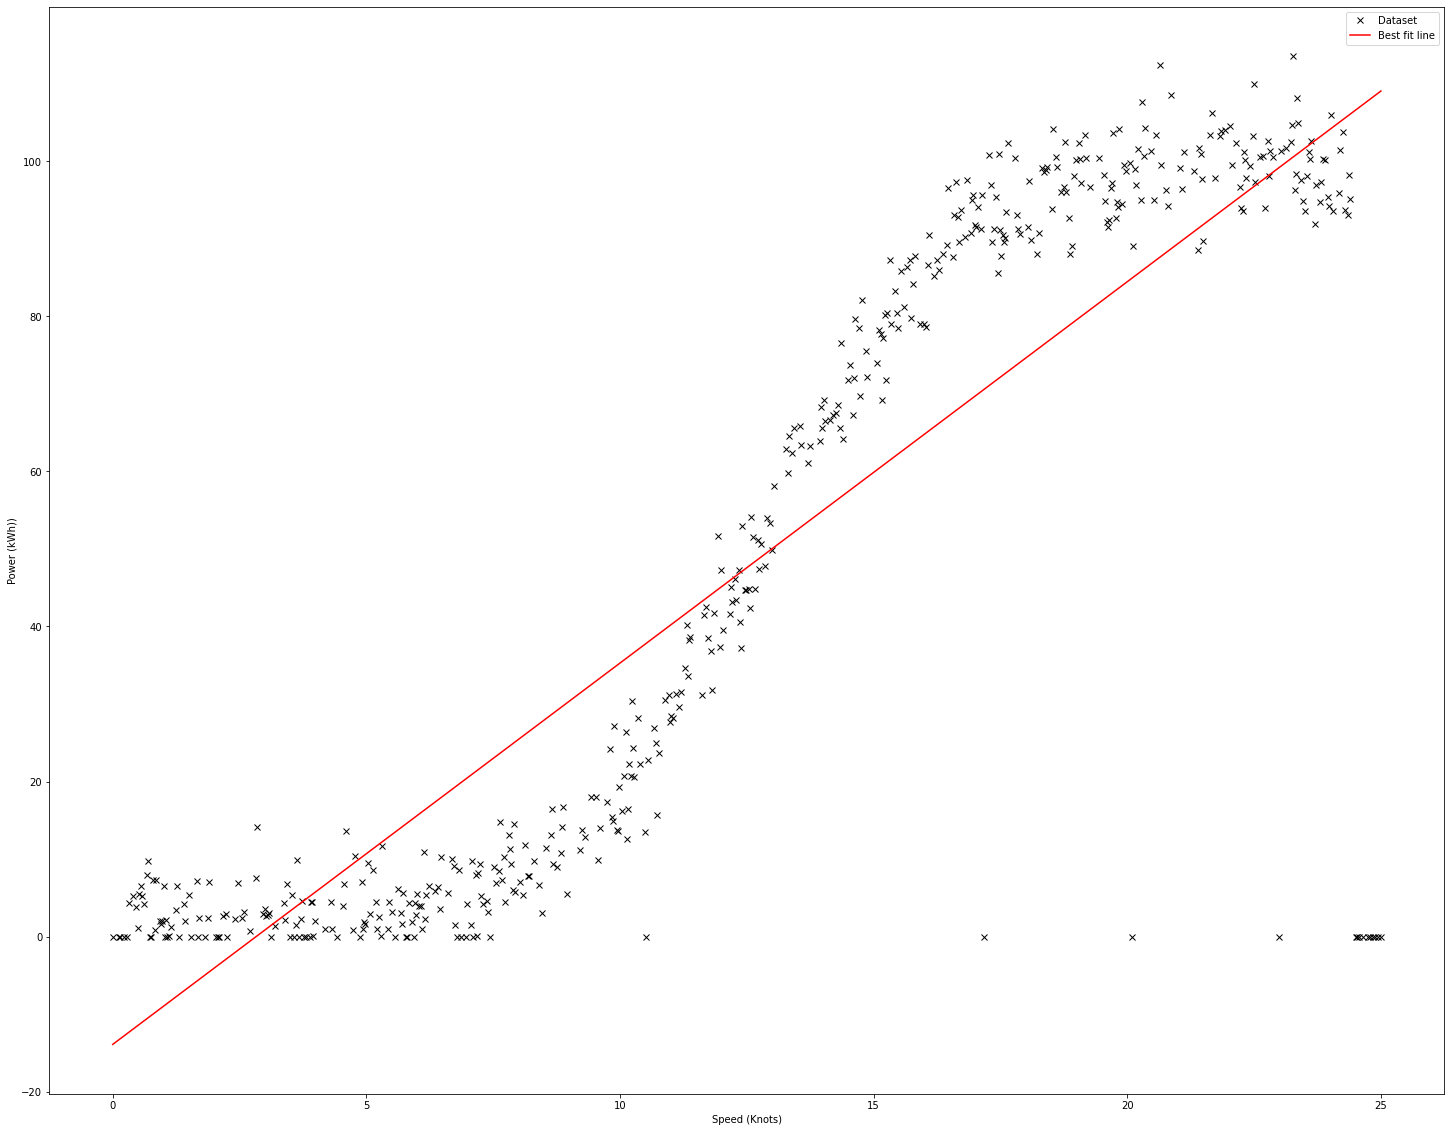

In [58]:
plt.plot(x, y, 'kx', label = 'Dataset')
plt.plot(x, m * x + c, 'r-', label='Best fit line')

plt.xlabel('Speed (Knots)')
plt.ylabel('Power (kWh))')
plt.legend()

plt.show()

In [59]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

def futvalu(x):
  return slope * x + intercept

speed = futvalu(10)

print(speed)

# https://www.w3schools.com/python/python_ml_linear_regression.asp

35.276054023527074


Additional regressions to view 

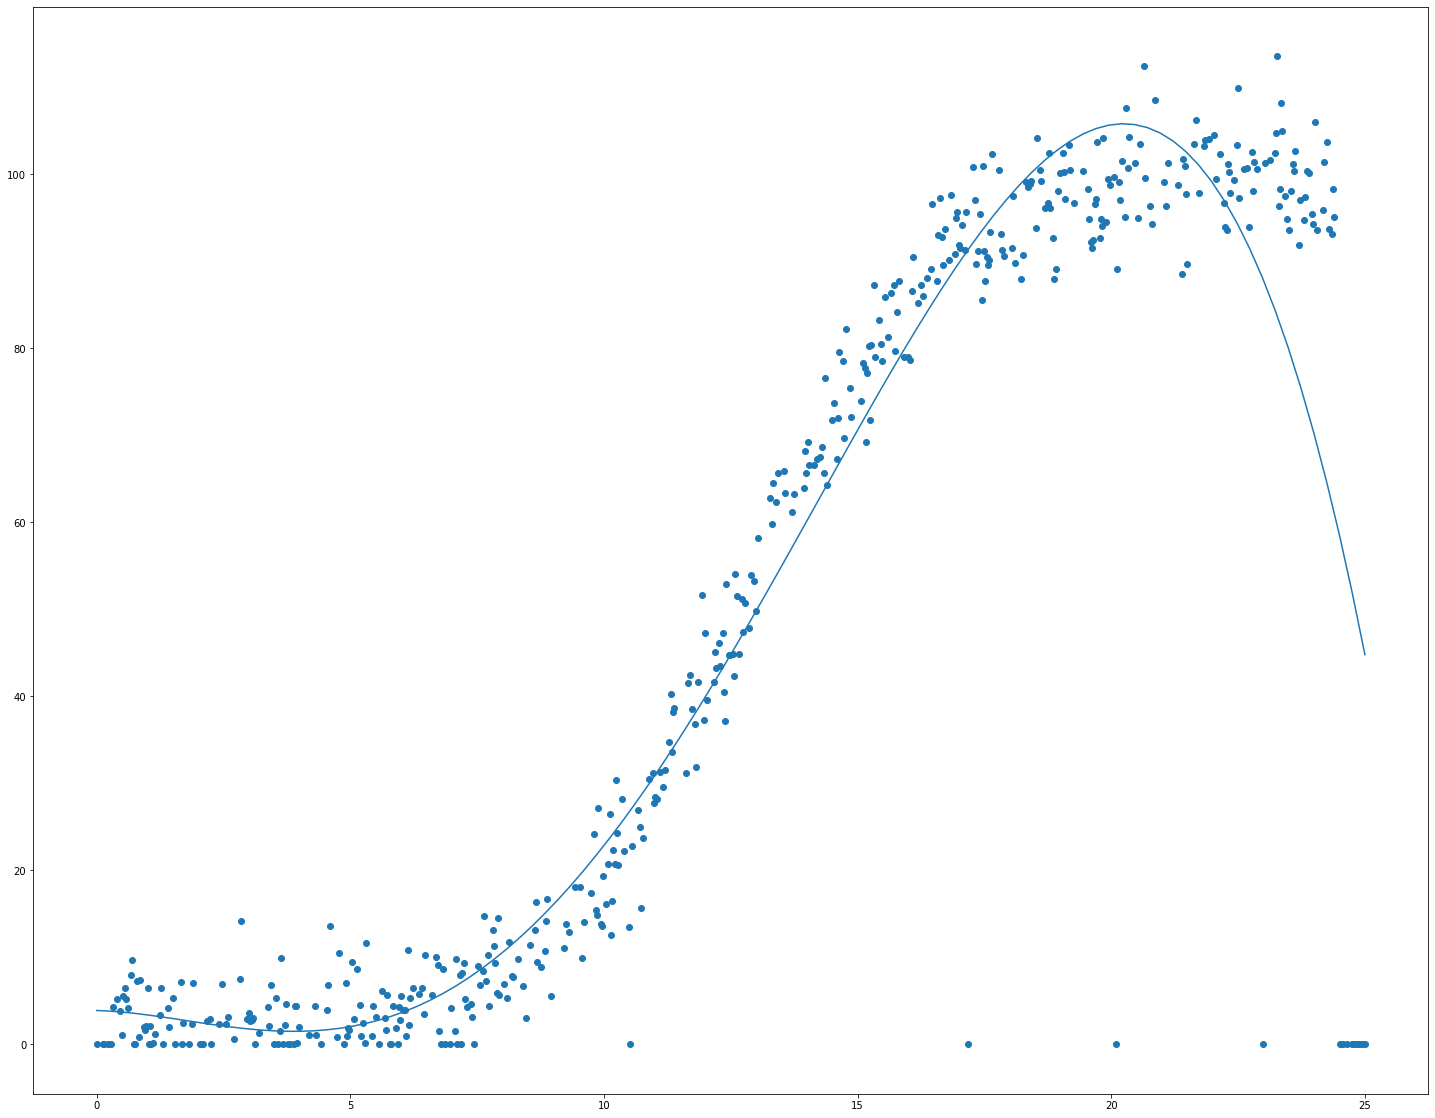

In [60]:
mymodel = np.poly1d(np.polyfit(x, y, 4))

myline = np.linspace(0, 25, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [61]:
from sklearn.metrics import r2_score

mymodel = np.poly1d(np.polyfit(x, y, 3))

print(r2_score(y, mymodel(x)))

0.8796883953739737


In [62]:
mymodel = np.poly1d(np.polyfit(x, y, 4))

speed = mymodel(25)
print(speed)

44.773939042518236


https://www.w3schools.com/python/python_ml_polynomial_regression.asp



https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html




https://realpython.com/linear-regression-in-python/
https://towardsdatascience.com/simple-linear-regression-model-using-python-machine-learning-eab7924d18b4




In [14]:

# First calculate the means (a.k.a. averages) of w and d.
x_avg = np.mean(x)
y_avg = np.mean(y)

# Subtract means from w and d.
x_zero = x - x_avg
y_zero = y - y_avg

# The best m is found by the following calculation.
m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)
# Use m from above to calculate the best c.
c = y_avg - m * x_avg

print(x_avg)
print(y_avg)
print(x_zero)
print(y_zero)
print(m)
print(c)
print("m is %8.6f and c is %6.6f." % (m, c))

12.590397999999988
48.014584
0     -12.590398
1     -12.465398
2     -12.440398
3     -12.365398
4     -12.315398
         ...    
495    12.184602
496    12.259602
497    12.284602
498    12.359602
499    12.409602
Name: speed, Length: 500, dtype: float64
0     -48.014584
1     -48.014584
2     -48.014584
3     -48.014584
4     -48.014584
         ...    
495   -48.014584
496   -48.014584
497   -48.014584
498   -48.014584
499   -48.014584
Name: power, Length: 500, dtype: float64
4.917595665404668
-13.899902630519541
m is 4.917596 and c is -13.899903.


In [20]:
np.polyfit(x, y, 1)

array([  4.91759567, -13.89990263])